# Testing hypotheses with $t$-tests, ANOVA, and chi-square

## a) Hypothesis testing with a $t$-test

In [ ]:
# Import the required libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Import the ab_test.csv file (data set) from GitHub with a url.
url = "https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/ab_test.csv"

# Load the data set by specifying the url.
data = pd.read_csv(url)

# View the DataFrame.
data.head()

,Unnamed: 0,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,0,1,control,old,6.554592,0,Spanish
1,1,2,control,old,5.620046,0,Spanish
2,2,3,control,old,7.684967,1,Spanish
3,3,4,treatment,new,4.228134,1,French
4,4,5,control,old,5.959690,0,Spanish


In [ ]:
# Drop the 'Unnamed: 0' column – redundant index.
data.drop(columns=['Unnamed: 0'],
          inplace=True)

# View the first 10 rows of the DataFrame.
print(data.shape)
data.head(10)

(1000, 6)


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,1,control,old,6.554592,0,Spanish
1,2,control,old,5.620046,0,Spanish
2,3,control,old,7.684967,1,Spanish
3,4,treatment,new,4.228134,1,French
4,5,control,old,5.959690,0,Spanish
5,6,control,old,5.207311,0,Spanish
6,7,control,old,5.730399,0,English
7,8,treatment,new,6.294815,0,Spanish
8,9,control,old,6.441502,0,Spanish
9,10,control,old,6.808718,0,French


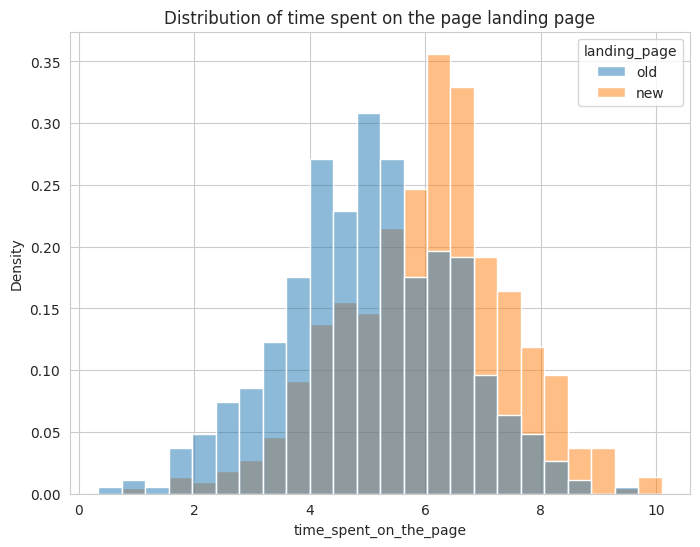

In [ ]:
# Exploratory data analysis.
# Create three plots: histogram, countplot, and boxplot.
# Set the style of Seaborn for better visualisation.
sns.set_style("whitegrid")

# a) Create the histogram.
# Distribution of time spent on the page.
plt.figure(figsize=(8, 6))
sns.histplot(data=data,
             x='time_spent_on_the_page',
             hue='landing_page',
             stat='density',
             common_norm=False)

plt.title('Distribution of time spent on the page landing page')
plt.show()

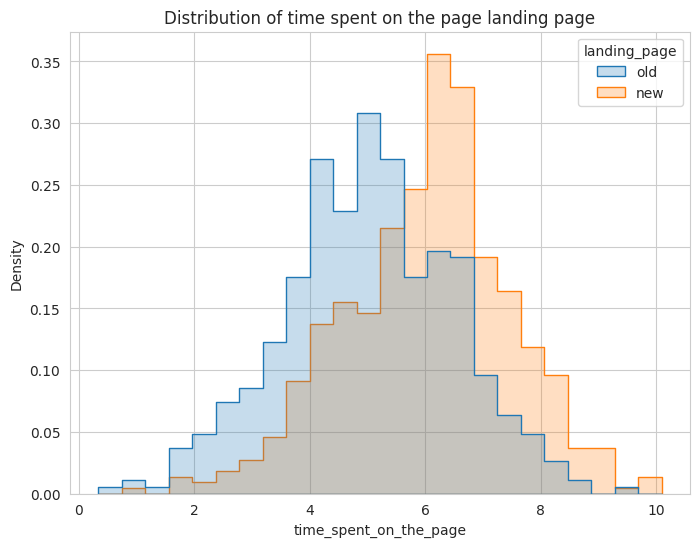

In [ ]:
# Exploratory data analysis.
# Create three plots: histogram, countplot, and boxplot.
# Set the style of Seaborn for better visualisation.
sns.set_style("whitegrid")

# a) Create the histogram.
# Distribution of time spent on the page.
plt.figure(figsize=(8, 6))
sns.histplot(data=data,
             x='time_spent_on_the_page',
             hue='landing_page',
             element='step',
             stat='density',
             common_norm=False)

plt.title('Distribution of time spent on the page landing page')
plt.show()

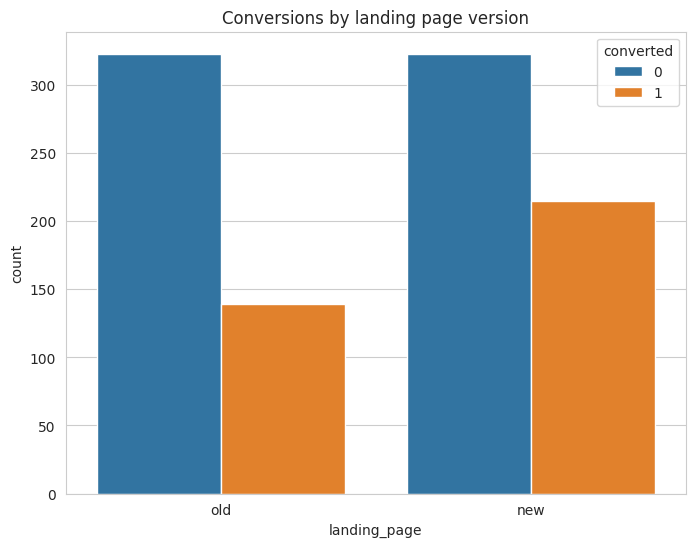

In [ ]:
# b) Create a barplot.
# Conversions by landing page version.
plt.figure(figsize=(8, 6))
sns.countplot(data=data,
              x='landing_page',
              hue='converted')

plt.title('Conversions by landing page version')
plt.show()

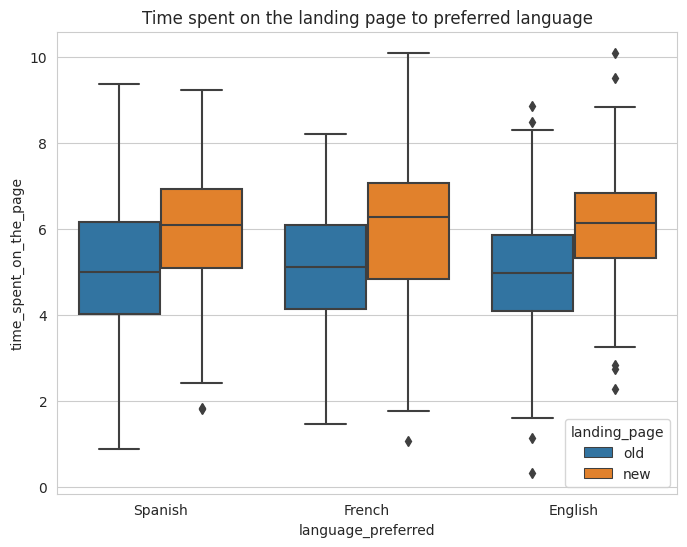

In [ ]:
# c) Create a boxplot.
# Time spent on the page to preferred language.
plt.figure(figsize=(8, 6))
sns.boxplot(data=data,
            x='language_preferred',
            y='time_spent_on_the_page',
            hue='landing_page')

plt.title('Time spent on the landing page to preferred language')
plt.show()

Formulate the hypotheses as follows:
- $H_0$: There is **no difference** in time spent between the old website and the new website.
- $H_1$: There is a **significant difference** in time spent between the old website and the new website.


In [ ]:
# Import the ttest_ind function from the scipy.stats module.
from scipy.stats import ttest_ind

# Specify the control and treatment groups.
control_group = data[data['group'] == 'control']
treatment_group = data[data['group'] == 'treatment']

# T-test for time spent on the page.
t_stat_time, p_val_time = ttest_ind(control_group['time_spent_on_the_page'],
                                    treatment_group['time_spent_on_the_page'])

# Display the results.
print("T-statistic:", t_stat_time)
print("P-value:", p_val_time)
print("Proportion of control group:", prop_control)
print("Proportion of treatment group:", prop_treatment)


T-statistic: -10.96365504694956
P-value: 1.7282901138602426e-26
Proportion of control group: 0.3008658008658009
Proportion of treatment group: 0.3996282527881041


## b) Hypothesis testing with ANOVA

In [ ]:
# Import the required libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Set a random seed for reproducibility.
np.random.seed(42)

# Create a hypothetical data set.
data = {'Design': np.repeat(['A', 'B', 'C'], 30),
        'ConversionRate': (np.random.normal(loc=2.5, scale=0.5, size=30).tolist() +
                           np.random.normal(loc=3.0, scale=0.5, size=30).tolist() +
                           np.random.normal(loc=2.8, scale=0.5, size=30).tolist())}

# Create a DataFrame.
df = pd.DataFrame(data)

# View the DataFrame.
print(df.shape)
df

(90, 2)


,Design,ConversionRate
0,A,2.748357
1,A,2.430868
2,A,2.823844
3,A,3.261515
4,A,2.382923
...,...,...
85,C,2.549121
86,C,3.257701
87,C,2.964376
88,C,2.535120


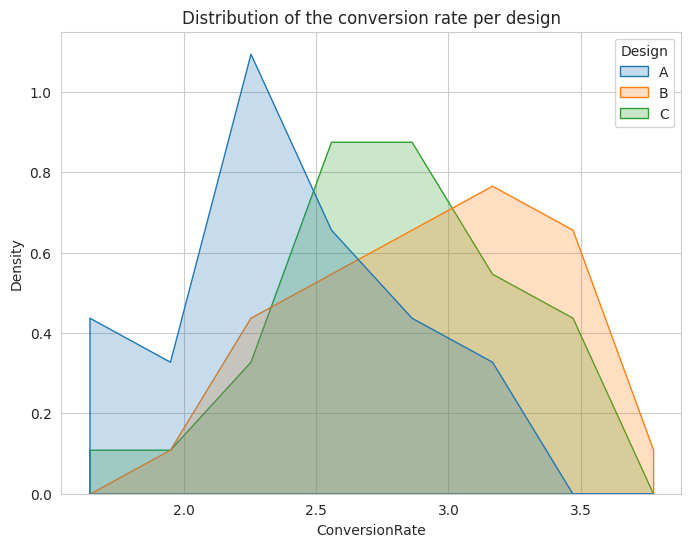

In [ ]:
# Exploratory data analysis.
# Create a histogram to visualise the distribution of the data.

# Set the style of Seaborn for better visualisation.
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(data=df,
             x='ConversionRate',
             hue='Design',
             element='poly',
             stat='density',
             common_norm=False)

plt.title('Distribution of the conversion rate per design')
plt.show()

Formulate the hypotheses as follows:
- $H_0$: $\mu_a=\mu_b=\mu_c$.
- $H_1$: At **least one** $\mu$ will differ.


In [ ]:
# Import required library.
import scipy.stats as stats

# Perform ANOVA.
f_statistic, p_value = stats.f_oneway(
    df['ConversionRate'][df['Design'] == 'A'],
    df['ConversionRate'][df['Design'] == 'B'],
    df['ConversionRate'][df['Design'] == 'C'])

# View the output.
print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 10.433162788234146
p-value: 8.680634990441438e-05


## c) Hypothesis testing with chi-square

In [ ]:
# Import the required libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Create a hypothetical data set.
data = {'Design': ['A', 'B', 'C',
                   'A', 'B', 'C',
                   'A', 'B', 'C'],
        'AgeGroup': ['18-25', '18-25', '18-25',
                     '26-35', '26-35', '26-35',
                     '36-45', '36-45', '36-45'],
        'Count': [30, 14, 6,
                  29, 22, 9,
                  12, 18, 20]}

# Convert data into a DataFrame.
df_cs = pd.DataFrame(data)

# View the output.
print(df_cs.shape)
df_cs

(9, 3)


,Design,AgeGroup,Count
0,A,18-25,30
1,B,18-25,14
2,C,18-25,6
3,A,26-35,29
4,B,26-35,22
5,C,26-35,9
6,A,36-45,12
7,B,36-45,18
8,C,36-45,20


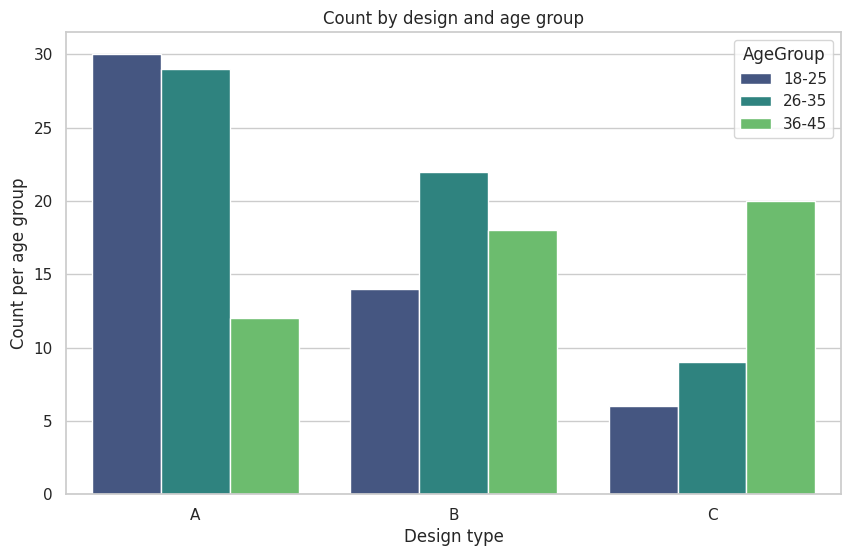

In [ ]:
# Exploratory data analysis.
# Create a barplot to visualise the data.

# Set the style of Seaborn for better visualisation.
sns.set(style="whitegrid")

# Create a barplot.
plt.figure(figsize=(10, 6))
sns.barplot(x='Design',
            y='Count',
            hue='AgeGroup',
            data=df_cs,
            palette='viridis')

plt.title('Count by design and age group')
plt.xlabel('Design type')
plt.ylabel('Count per age group')
plt.show()

Formulate the hypotheses as follows:
- $H_0$: Design and age group **are** independent.
- $H_1$: Design and age group **are not** independent.

In [ ]:
# Change the DataFrame format.
df_cs_pivot = df_cs.pivot(index='AgeGroup',
                          columns='Design',
                          values='Count')

# View the output.
print(df_cs_pivot.shape)
df_cs_pivot

(3, 3)


Design,A,B,C
AgeGroup,,,
18-25,30,14,6
26-35,29,22,9
36-45,12,18,20


In [ ]:
# Import the required library.
from scipy.stats import chi2_contingency

# Perform chi-square test.
chi2_stat, p_value, dof, ex = chi2_contingency(df_cs_pivot)


# View the output.
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)

Chi-square statistic: 19.390710683856224
p-value: 0.000658500172452594


# Reflection

The type of test you use to perform hypothesis testing will depend on the business scenario and the data set.

Imagine being a data analyst at a multinational sportswear company. The company has just introduced three new designs for running shoes and wants to know the following:

1. Is there a significant difference in the average sales of the three shoe designs?
2. Is there an association between gender and shoe design preference?
3. Does the store location (urban vs rural) have a significant impact on shoe sales for each design?

Question one requires one way ANOVA, question two requires chi-squared, and question three requires two way ANOVA. So for one business problem, multiple types of hypothesis testing may be required.